In [14]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [15]:
criminal_monthly_activity = pd.read_csv("monthly-criminal-activity.csv", low_memory=False)

In [16]:
criminal_monthly_activity.head()

,_id,Report_Number,ReportedDate,ReportedTime,Hour,DayofWeek,ReportedMonth,NIBRS_Coded_Offense,NIBRS_Offense_Code,NIBRS_Offense_Category,NIBRS_Offense_Type,NIBRS_Crime_Against,NIBRS_Offense_Grouping,Violation,XCOORD,YCOORD,Zone,Tract,Neighborhood,Block_Address
0,1,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,13A AGGRAVATED ASSAULT,13A,Assault Offenses,Aggravated Assault,Person,A,18 2718 A1 Strangulation Basic - Applying,-80.0268,40.3964,Zone 6,1919,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
1,2,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,13C INTIMIDATION,13C,Assault Offenses,Intimidation,Person,A,18 2706 A1 Terroristic Threats-General,-80.0268,40.3964,Zone 6,1919,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
2,3,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,90Z ALL OTHER OFFENSES,90Z,All other Offenses,All other Offenses,Group B,B,75 3733 A Fleeing or Attempting To Elude Polic...,-80.0268,40.3964,Zone 6,1919,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
3,4,PGHP24000024,2024-01-01,00:31,0,Monday,Jan,23H ALL OTHER LARCENY,23H,Larceny/Theft Offenses,All Other Larceny,Property,A,18 3921 A Theft by Unlawful Taking-Movable – L...,-80.0268,40.3964,Zone 6,1919,Brookline,"2800 Block of FITZHUGH WAY Pittsburgh, PA"
4,5,PGHP24000017,2024-01-01,00:21,0,Monday,Jan,9999 Vehicle Offense (Not NIBRS Reportable),999,Not NIBRS Reportable,Not NIBRS Reportable,Group B,B,LO 6 101 Discharge of Firearms Prohibited,-80.0243,40.4582,Zone 1,2107,Manchester,"1200 Block of COLUMBUS AVE Pittsburgh, PA"


In [17]:
# Number of unique of offense types 
print(criminal_monthly_activity["NIBRS_Offense_Type"].nunique())
# List of unique offense types 
print(criminal_monthly_activity["NIBRS_Offense_Type"].unique())

54
['Aggravated Assault' 'Intimidation' 'All other Offenses'
 'All Other Larceny' 'Not NIBRS Reportable' 'Theft from Building'
 'Drunkenness' 'Disorderly Conduct' 'Trespass of Real Property'
 'Simple Assault' 'Destruction/Damage/Vandalism of Property' 'Shoplifting'
 'Credit Card/ATM Fraud' 'Theft of Motor Vehicle Parts or Accessories'
 'False Pretenses/Swindle/Confidence Game' 'Weapon Law Violations'
 'Pocket-Picking' 'Drug Equipment Violations' 'Stolen Property Offenses'
 'Drug/Narcotic Violations' 'Robbery' 'Motor Vehicle Theft'
 'Forcible Sodomy' 'Burglary/Breaking & Entering'
 'Driving Under the Influence' 'Sexual Assault With An Object'
 'Theft from Motor Vehicle' 'Impersonation' 'Bad Checks'
 'Counterfeiting/Forgery' 'Forcible Rape' 'Statutory Rape'
 'Assisting or Promoting Prostitution' 'Arson'
 'Family Offenses, Nonviolent' 'Pornography/Obscene Material'
 'Curfew/Loiting/Vagrancy Violations' nan 'Forcible Fondling'
 'Purse-snatching' 'Involuntary Servitude' 'Kidnapping/Abductio

In [18]:
# Number of unique neighborhoods
print(criminal_monthly_activity["Neighborhood"].nunique())
# List of all the unique neighborhoods
print(criminal_monthly_activity["Neighborhood"].unique())

91
['Brookline' 'Manchester' 'Point Breeze North' 'South Side Flats'
 'North Shore' 'Greenfield' 'Homewood North' 'South Side Slopes'
 'Central Business District' nan 'East Liberty' 'North Oakland'
 'Squirrel Hill South' 'East Allegheny' 'Strip District'
 'Lincoln–Lemington–Belmar' 'Shadyside' 'Carrick' 'Point Breeze'
 'Morningside' 'Allentown' 'Crafton Heights' 'Mount Washington'
 'Crawford-Roberts' 'Marshall-Shadeland' 'Central Oakland' 'Elliott'
 'Brighton Heights' 'Central Lawrenceville' 'Summer Hill' 'South Oakland'
 'Homewood South' 'Knoxville' 'Terrace Village' 'West Oakland' 'Fineview'
 'Perry South' 'Upper Lawrenceville' 'Bluff' 'Sheraden'
 'Spring Hill–City View' 'Bloomfield' 'Beechview' 'Squirrel Hill North'
 'Garfield' 'Banksville' 'Bon Air' 'Northview Heights' 'Overbrook'
 'Larimer' 'Hazelwood' 'Friendship' 'Central Northside' 'Homewood West'
 'Lower Lawrenceville' 'East Carnegie' 'Bedford Dwellings'
 'Lincoln-Lemington-Belmar' 'New Homestead' 'Troy Hill' 'Highland Park'
 

In [19]:
# Remove empty rows in Neighborhood 
crimes = criminal_monthly_activity[criminal_monthly_activity["Neighborhood"] != " "]

# Remove "Not NIRBS reportable" from the NIBRS Offense Type
crimes = crimes[crimes["NIBRS_Offense_Type"] != "Not NIRBS Reportable"]

In [46]:
# Severity scores for each of the crimine/offense commited 
severity_score = {"Murder & Nonnegligent Manslaughter" : 10,
                  "Rape" : 10,
                  "Aggravated Assult" : 9, 
                  "Robbery" : 8,
                  "Simple Assult" : 7, 
                  "Burglary" : 6, 
                  "Intimidation" : 5,
                  "Theft from building" : 5, 
                  "Motor Vehicle Theft": 4,
                  "All other larcent" : 4, 
                  "Destruction/Damage/Vandalism of property": 3,
                  "Shoplifting" : 2,
                  "Credit card/ATM fraud": 2,
                  "Drunkness": 1,
                  "Disorderly conduct": 1,
                  "All other offenses": 2 }

# Adds a new column named "Severity" 
# Any NIRBS Offense Type that didn't match the key in the dictionary severity_score is given a score of 2
crimes["Severity"] = crimes["NIBRS_Offense_Type"].map(severity_score).fillna(2)

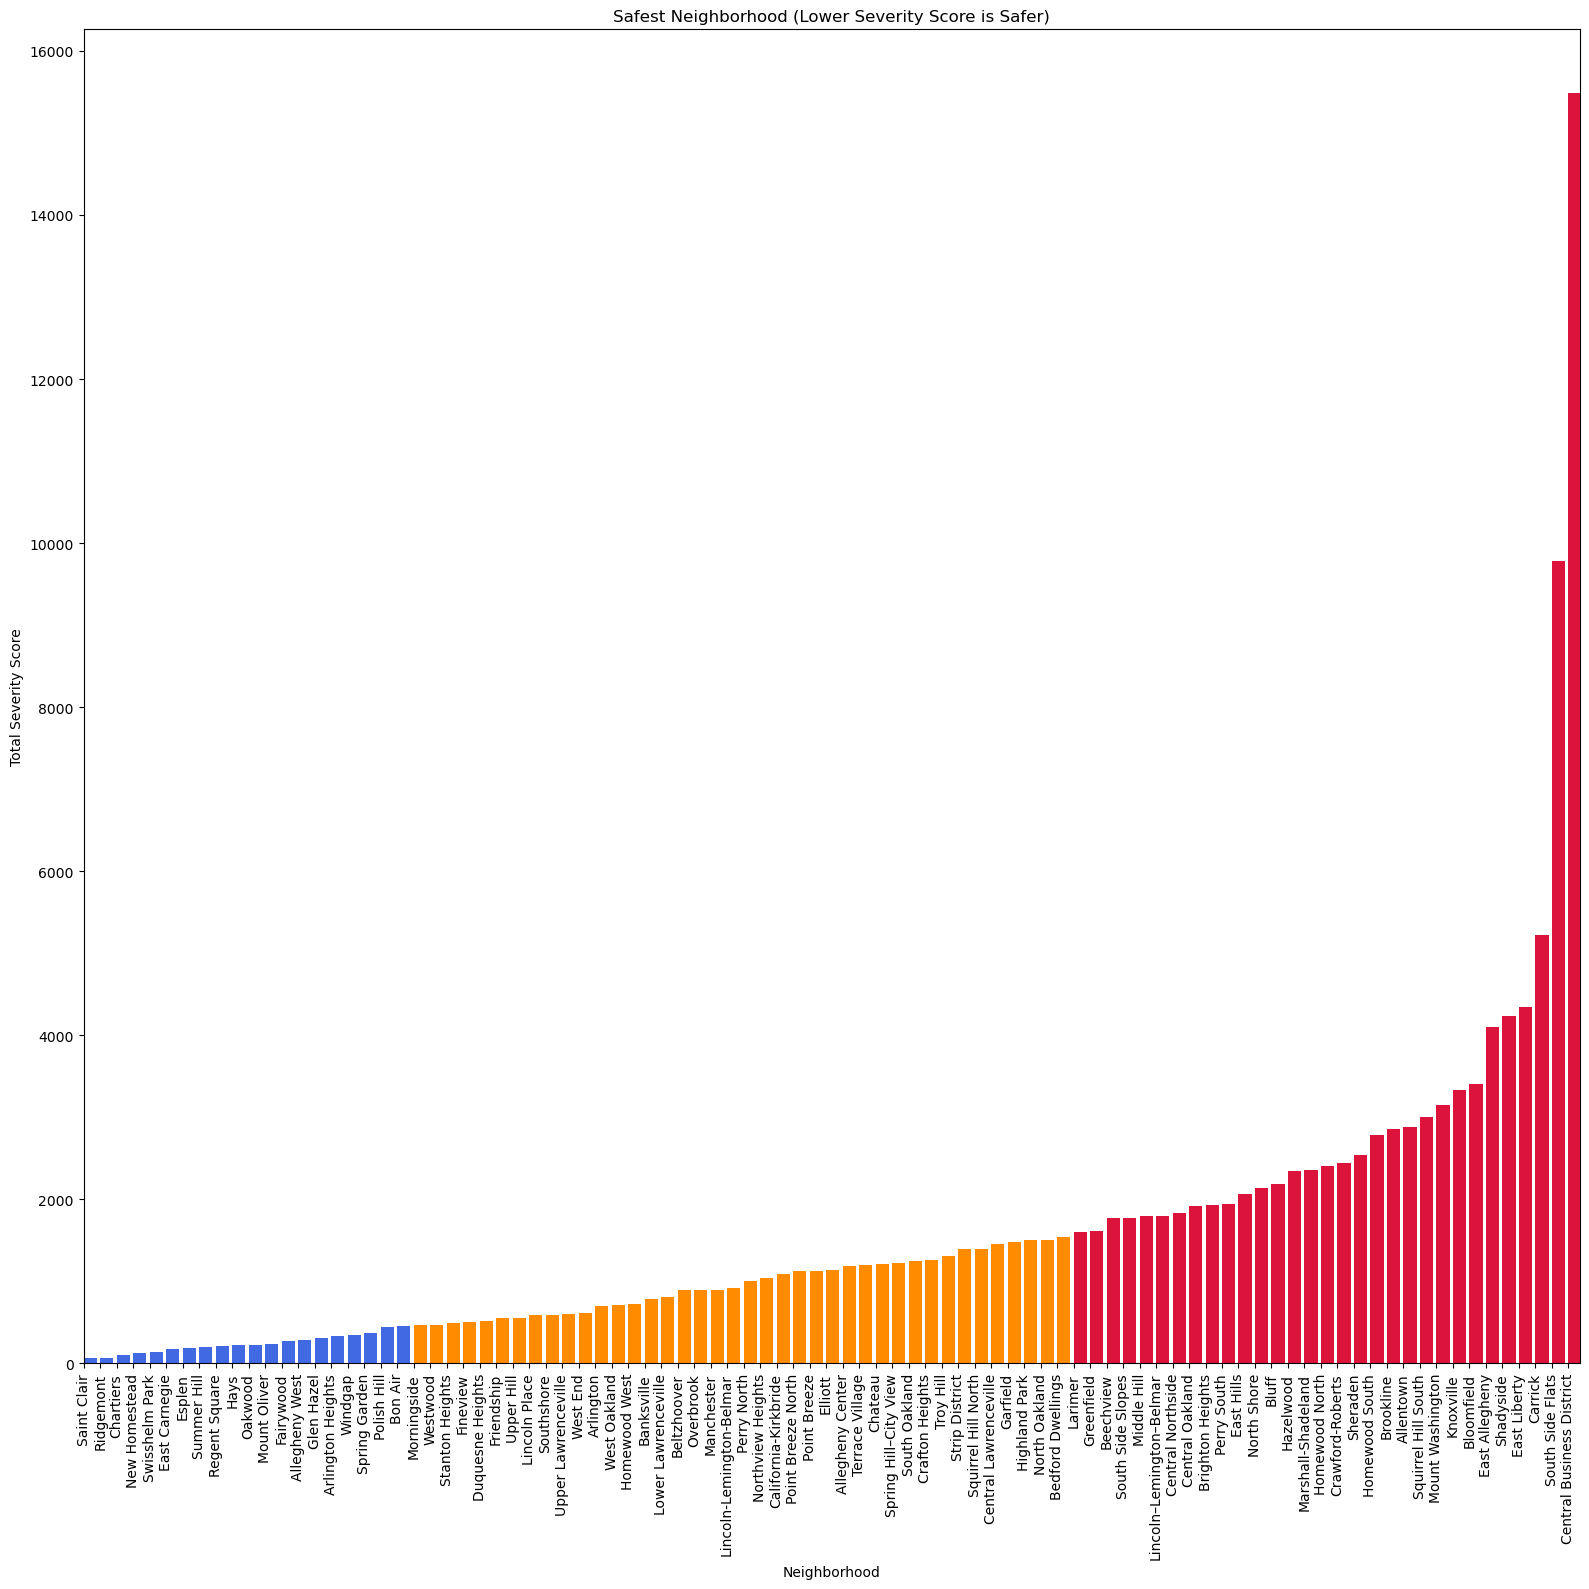

In [84]:
# Graph of all the neighborhoods
total_crime = crimes.groupby("Neighborhood").agg(Score = ("Severity", "sum"), Total_Crimes = ("Severity", "count")).reset_index()

# Sorts by total severity score
total_crime = total_crime.sort_values("Score")

colors = ["royalblue" if score <= 460 else "darkorange" if 460 < score <= 1600 else "crimson" for score in total_crime["Score"]]

plt.figure(figsize = (16, 16))
plt.bar(total_crime["Neighborhood"], total_crime["Score"], align = "edge", color = colors)
plt.xticks(rotation = 90)
plt.xlabel("Neighborhood")
plt.ylabel("Total Severity Score")
plt.xlim(0, len(total_crime)-0.3)
plt.title("Safest Neighborhood (Lower Severity Score is Safer)")
plt.tight_layout()
plt.show()

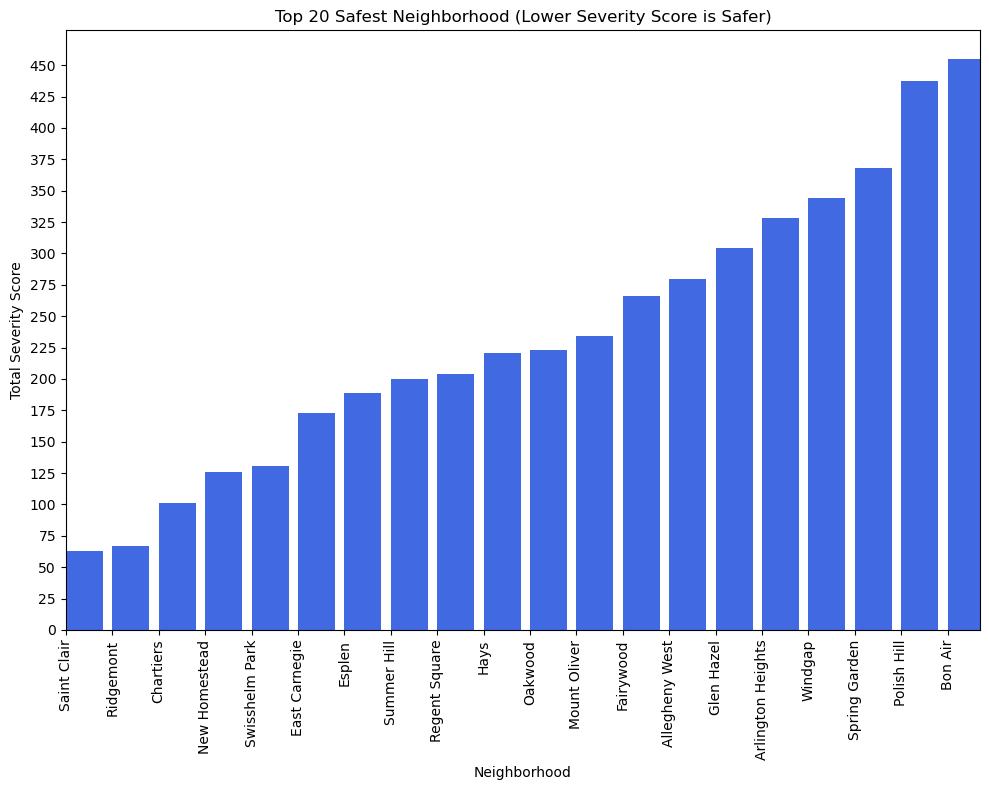

In [88]:
# Graph of top 20 safest neighborhood
total_crime = crimes.groupby("Neighborhood").agg(Score = ("Severity", "sum"), Total_Crimes = ("Severity", "count")).reset_index()

# Sorts by total severity score
total_crime = total_crime.sort_values("Score")

# Top 20 with the lowest severity score
top_20 = total_crime.head(20)

plt.figure(figsize = (10, 8))
plt.bar(top_20["Neighborhood"], top_20["Score"], align ="edge", color = "royalblue")
plt.xticks(rotation = 90)
plt.yticks(np.arange(0, 460, 25))
plt.xlabel("Neighborhood")
plt.ylabel("Total Severity Score")
plt.title("Top 20 Safest Neighborhood (Lower Severity Score is Safer)")
plt.xlim(0, len(top_20)-0.3)
plt.tight_layout()
plt.show()

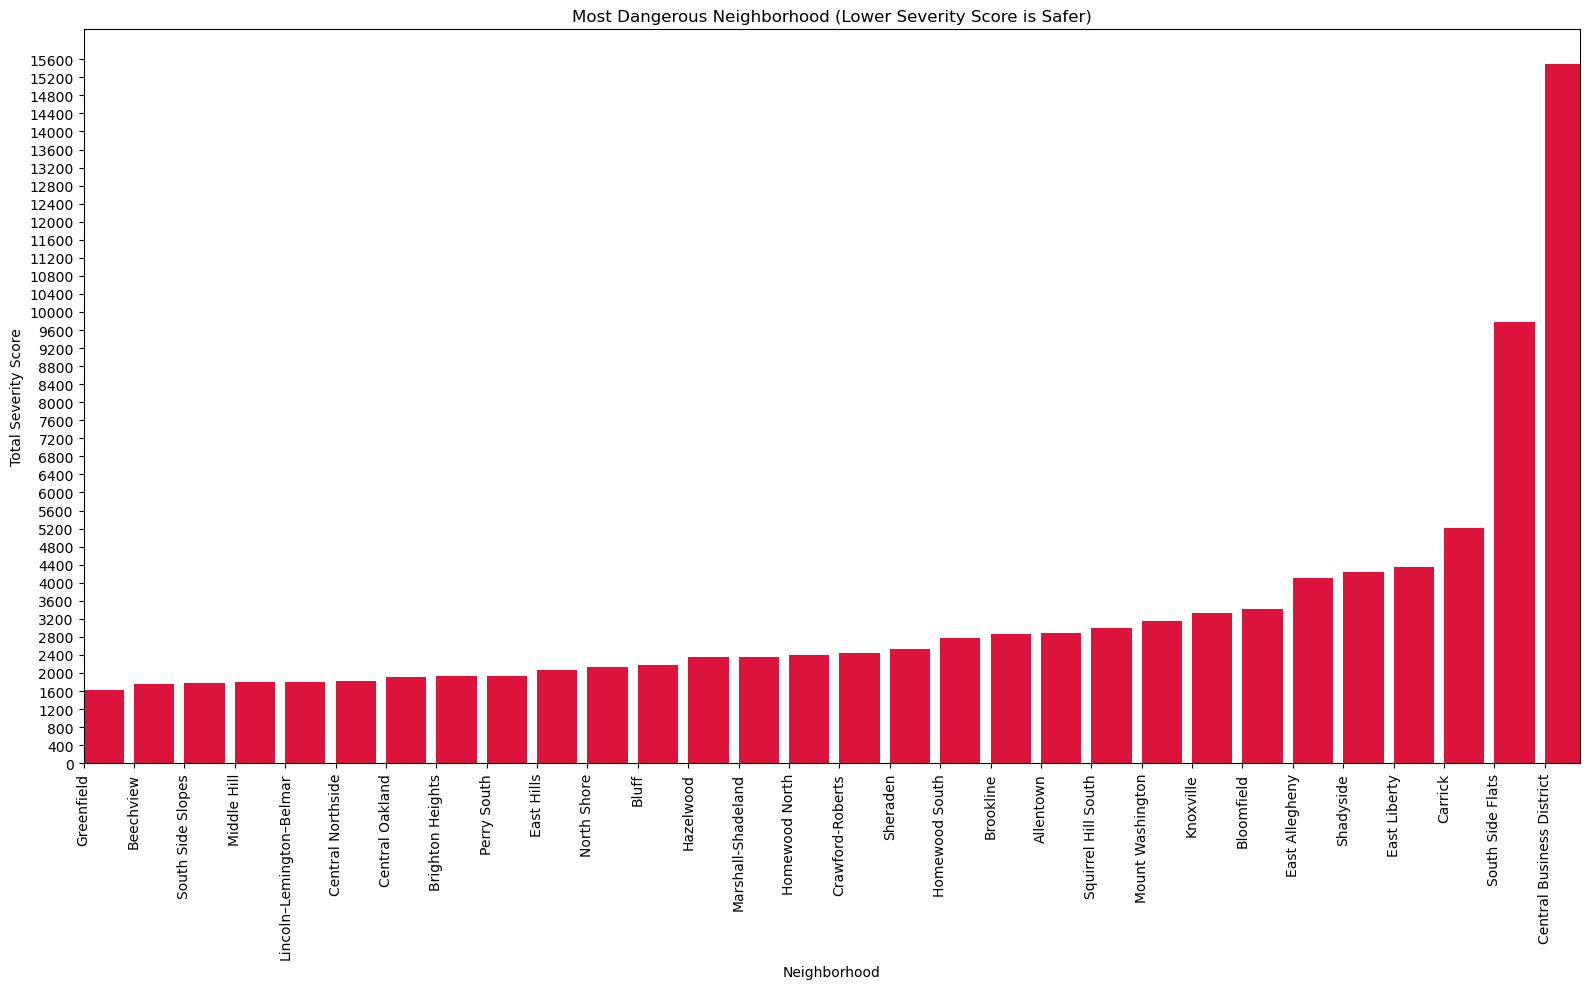

In [89]:
# 30 of the most dangerous neighborhoods based on severity score
total_crime = crimes.groupby("Neighborhood").agg(Score = ("Severity", "sum"), Total_Crimes = ("Severity", "count")).reset_index()

total_crime.columns = ["Neighborhood", "Score", "Total_Crimes"]
total_crime = total_crime.sort_values("Score")

bottom_30 = total_crime.tail(30)

plt.figure(figsize = (16, 10))
plt.bar(bottom_30["Neighborhood"], bottom_30["Score"], align ="edge", color = "crimson")
plt.xticks(rotation = 90)
plt.yticks(np.arange(0, 16000, 400))
plt.xlabel("Neighborhood")
plt.ylabel("Total Severity Score")
plt.title("Most Dangerous Neighborhood (Lower Severity Score is Safer)")
plt.xlim(0, len(bottom_30)-0.3)
plt.tight_layout()
plt.show()

In [58]:
print("Top 30 Safest Neighborhood")
total_crime = total_crime.sort_values("Score")
total_crime = total_crime.reset_index(drop = True)
total_crime.index = total_crime.index + 1
print(total_crime.head(30))

Top 30 Safest Neighborhood
           Neighborhood  Score  Total_Crimes
1           Saint Clair   63.0            25
2             Ridgemont   67.0            32
3             Chartiers  101.0            38
4         New Homestead  126.0            51
5        Swisshelm Park  131.0            61
6         East Carnegie  173.0            75
7                Esplen  189.0            79
8           Summer Hill  200.0            77
9         Regent Square  204.0            95
10                 Hays  221.0           100
11              Oakwood  223.0            84
12         Mount Oliver  234.0           104
13            Fairywood  266.0           107
14       Allegheny West  280.0           125
15           Glen Hazel  304.0           125
16    Arlington Heights  328.0           122
17              Windgap  344.0           144
18        Spring Garden  368.0           151
19          Polish Hill  437.0           192
20              Bon Air  455.0           207
21          Morningside  469